In [55]:
import pandas as pd
#import bamboolib
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

import seaborn as sns
import scipy
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial as sp
import bamboolib as bam


# Chargement des données

In [59]:
current_directory = os.getcwd()
print(current_directory)

if 'aymeric' in current_directory:
    path_base = "/home/aymeric/python-scripts/anses_medialab/datas/" #aymeric
elif 'Mac' in current_directory:
    path_base = '~/Dropbox/Mac/Desktop/CRD Anses/all3/' # Jean Philippe
else:
    path_base = "d:/Projects/Medialab/"

df_sim = pd.read_csv(f'{path_base}similarity_facebook_5.csv', sep = "\t", index_col = 0)
#df_sim_5 = pd.read_csv(f'{path_base}similarity_facebook_5.csv', sep = "\t", index_col = 0)

# df_sim = df_sim.replace('@genefutures', 'aat_genefutures')
# df_sim = df_sim.rename(columns={'@genefutures': 'aat_genefutures'})
# df_sim=df_sim.reset_index()
#df_sim = df_sim.reset_index()
df_sim

/home/aymeric/python-scripts/anses_medialab/analyse_tweets


                            @genefutures  abeilles  autorité européenne  \
@genefutures                    1.000000  0.001486             0.000000   
abeilles                        0.001486  1.000000             0.086298   
autorité européenne             0.000000  0.086298             1.000000   
cancers                         0.016128  0.023206             0.047283   
cancérogène                     0.000000  0.004129             0.212798   
centre international            0.000000  0.015178             0.116937   
chercheuse                      0.000000  0.076272             0.013411   
colonies d'abeilles             0.000000  0.344655             0.020833   
coopérative agricole            0.000000  0.001649             0.000000   
corrélation                     0.000000  0.000000             0.000000   
cour d'appel                    0.000000  0.011373             0.002635   
désherbant                      0.000000  0.002624             0.094853   
ecologie                 

## From dataframe to numpy array

In [60]:
similarity = df_sim.to_numpy()
list_name = [x for x in df_sim.columns]
print(list_name)

['@genefutures', 'abeilles', 'autorité européenne', 'cancers', 'cancérogène', 'centre international', 'chercheuse', "colonies d'abeilles", 'coopérative agricole', 'corrélation', "cour d'appel", 'désherbant', 'ecologie', 'efsa', 'expositions', 'grande distribution', 'greenpeace', 'jardinerie', 'lasso', 'malformations', 'milieu', 'monsanto', 'mortalité', 'moustique', 'nutréa-triskalia', 'ogm', 'oms', 'paul françois', 'perturbateurs endocriniens', 'pesticides', 'produits chimiques', 'recherche', 'roundup', 'roundup de monsanto', 'ruches', 'salariés', 'santé', 'scientifiques', 'substances', 'syngenta', 'sécurité des aliments', 'taux de mortalité', 'terre de diatomée', 'traces', 'triskalia', 'troubles', 'viandes', 'vignerons', 'vignes', 'études']


# Matrice

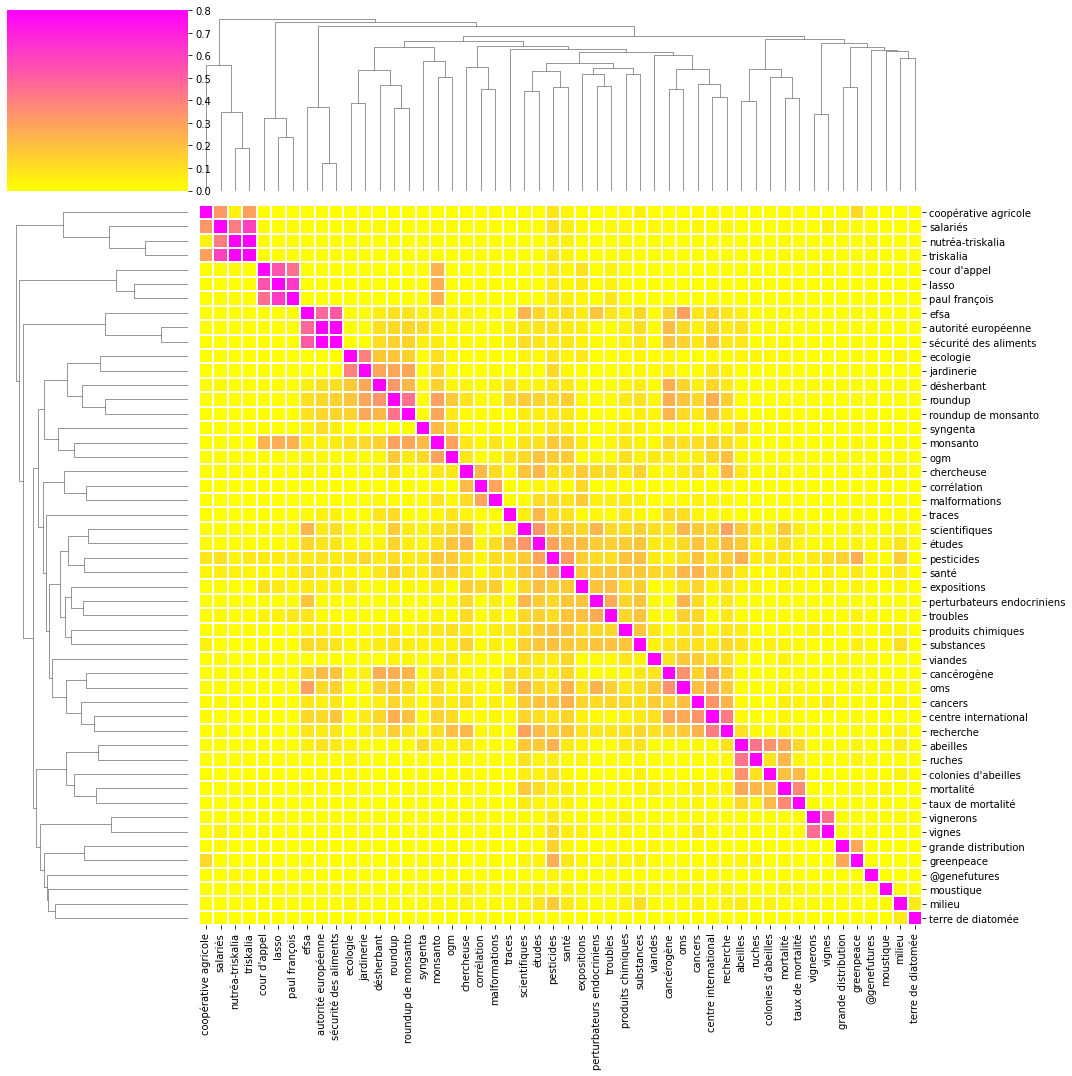

In [61]:
from matplotlib import pyplot as plt


cmap_reversed = plt.cm.get_cmap('spring_r')
#sns.clustermap(rho_terms)
ax=sns.clustermap(similarity,figsize=(15,15), cmap = cmap_reversed, linewidths=2, linecolor='white', vmax = 0.8)#,labels=range(14))
new_labels=[]
labels_list=list_name
for l in ax.ax_heatmap.axes.get_xticklabels():
    l.set_text(labels_list[int(l.get_text())])
    new_labels.append(l)
ax.ax_heatmap.axes.set_yticklabels(new_labels,rotation=0)
ax.ax_heatmap.axes.set_xticklabels(new_labels,rotation = 90)

#ax.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.tight_layout()

# Dendogramme

In [62]:
fig = plt.figure(1, figsize=(15, 5))
th = 1.4
row_linkage = linkage(sp.distance.pdist(similarity), method='complete')# for x in (t.values, rho_terms.values.T))
row_linkage

array([[ 2.        , 40.        ,  0.27638001,  2.        ],
       [24.        , 44.        ,  0.43042012,  2.        ],
       [18.        , 27.        ,  0.54163984,  2.        ],
       [47.        , 48.        ,  0.77864728,  2.        ],
       [10.        , 52.        ,  0.7856985 ,  3.        ],
       [32.        , 33.        ,  0.83550408,  2.        ],
       [13.        , 50.        ,  0.86606955,  3.        ],
       [12.        , 17.        ,  0.8867849 ,  2.        ],
       [ 1.        , 34.        ,  0.90752548,  2.        ],
       [35.        , 51.        ,  0.90900095,  3.        ],
       [22.        , 41.        ,  0.93452711,  2.        ],
       [ 5.        , 31.        ,  0.95304986,  2.        ],
       [37.        , 49.        ,  1.00950067,  2.        ],
       [ 4.        , 26.        ,  1.03131831,  2.        ],
       [ 9.        , 19.        ,  1.03201066,  2.        ],
       [15.        , 16.        ,  1.04991578,  2.        ],
       [29.        , 36.

<Figure size 1080x360 with 0 Axes>

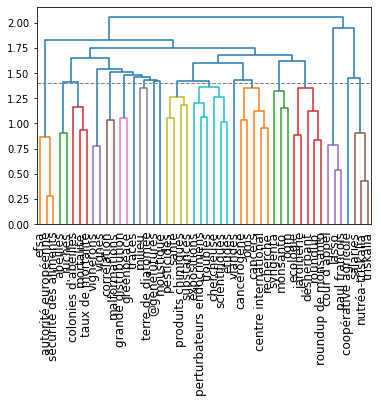

In [63]:
dn = dendrogram(row_linkage, leaf_rotation=90, leaf_font_size= 12, labels=list_name, color_threshold= th)
plt.axhline(y=th, c='grey', lw=1, linestyle='dashed')
#cluster_idx = scipy.cluster.hierarchy.fcluster(row_linkage,t=3, criterion='maxclust_monocrit')

In [64]:
nbclust_max=20
dfcost=pd.DataFrame()
for nbclust in  range(1,nbclust_max):
    cluster_idx = scipy.cluster.hierarchy.fcluster(row_linkage,nbclust,criterion='maxclust')
    cluster = [y for y in cluster_idx]    
    new_df = pd.DataFrame(data = {"term": list_name, "cluster": cluster})
    new_df['nbseg']=nbclust
    new_df_count = new_df.groupby(['cluster']).agg(term_size=('term', 'size')).reset_index()
    new_df_count = new_df_count.loc[new_df_count['term_size'] == 1]
    if len(new_df_count)>0:
        break
        
    dfcost=dfcost.append(new_df)
    
dfcost

                   term  cluster  nbseg
0          @genefutures        1      1
1              abeilles        1      1
2   autorité européenne        1      1
3               cancers        1      1
4           cancérogène        1      1
..                  ...      ...    ...
45             troubles        7     12
46              viandes        8     12
47            vignerons        3     12
48               vignes        3     12
49               études        7     12

[600 rows x 3 columns]

In [65]:
df_sim['v1']=df_sim.index
df_sim_melt = df_sim.melt(id_vars=['v1'])
df_sim_melt.columns=['v1', 'v2', 'sim']
df_sim_melt['dist']=1-df_sim_melt['sim']
df_sim_melt

                       v1            v2       sim      dist
0            @genefutures  @genefutures  1.000000  0.000000
1                abeilles  @genefutures  0.001486  0.998514
2     autorité européenne  @genefutures  0.000000  1.000000
3                 cancers  @genefutures  0.016128  0.983872
4             cancérogène  @genefutures  0.000000  1.000000
...                   ...           ...       ...       ...
2495             troubles        études  0.147782  0.852218
2496              viandes        études  0.064711  0.935289
2497            vignerons        études  0.009042  0.990958
2498               vignes        études  0.023740  0.976260
2499               études        études  1.000000  0.000000

[2500 rows x 4 columns]

In [66]:
df_dist_clust = pd.merge(df_sim_melt, dfcost, how='inner', left_on=['v1'], right_on=['term'])
df_dist_clust = pd.merge(df_dist_clust, dfcost, how='inner', left_on=['v2'], right_on=['term'])
df_dist_clust = df_dist_clust.loc[df_dist_clust['nbseg_x'] == df_dist_clust['nbseg_y']]
df_dist_clust = df_dist_clust.loc[df_dist_clust['cluster_x'] == df_dist_clust['cluster_y']]
#df_dist_clust['distsq']=df_dist_clust['dist']*df_dist_clust['dist']
df_dist_clust_inertia = df_dist_clust.groupby(['nbseg_x', 'cluster_x' ,'v1']).agg(dist_mean=('dist', 'mean')).reset_index()
df_dist_clust_inertia['distsq']=df_dist_clust_inertia['dist_mean']*df_dist_clust_inertia['dist_mean']

In [67]:
df_dist_clust_inertia = df_dist_clust_inertia.groupby(['nbseg_x', 'cluster_x']).agg(dist_mean_sum=('distsq', 'sum')).reset_index()
df_dist_clust_inertia

    nbseg_x  cluster_x  dist_mean_sum
0         1          1      43.753547
1         2          1      36.709559
2         2          2       3.317712
3         3          1      36.709559
4         3          2       0.286606
..      ...        ...            ...
73       12          8       2.619465
74       12          9       0.837689
75       12         10       1.700683
76       12         11       0.286606
77       12         12       0.810927

[78 rows x 3 columns]

In [68]:
df_dist_clust_inertia = df_dist_clust_inertia.groupby(['nbseg_x']).agg(dist_mean_sum=('dist_mean_sum', 'sum')).reset_index()
df_dist_clust_inertia

    nbseg_x  dist_mean_sum
0         1      43.753547
1         2      40.027272
2         3      37.807092
3         4      35.427271
4         5      32.154202
5         6      29.228704
6         7      26.631586
7         8      24.865916
8         9      22.656495
9        10      20.939708
10       11      19.317311
11       12      17.763540

In [69]:
import plotly.express as px
fig = px.scatter(df_dist_clust_inertia, x='nbseg_x', y='dist_mean_sum', width=800, height=600)
fig

In [70]:
from kneed import KneeLocator
x=df_dist_clust_inertia['nbseg_x'].values
y=df_dist_clust_inertia['dist_mean_sum'].values
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
nb_segm_optimal=kn.knee
print(nb_segm_optimal)

7


In [71]:
dfcost = dfcost.loc[dfcost['nbseg'] == nb_segm_optimal]
dfcost = dfcost.sort_values(by=['cluster'], ascending=[True])
dfcost

                          term  cluster  nbseg
13                        efsa        1      7
2          autorité européenne        1      7
40       sécurité des aliments        1      7
1                     abeilles        2      7
22                   mortalité        2      7
7          colonies d'abeilles        2      7
34                      ruches        2      7
41           taux de mortalité        2      7
48                      vignes        3      7
23                   moustique        3      7
20                      milieu        3      7
19               malformations        3      7
16                  greenpeace        3      7
15         grande distribution        3      7
0                 @genefutures        3      7
9                  corrélation        3      7
42           terre de diatomée        3      7
43                      traces        3      7
47                   vignerons        3      7
29                  pesticides        4      7
38           

In [72]:
term_x = []
term_y = []
cluster = []
for n, x in enumerate(dfcost["term"]):
    clust_x = dfcost["cluster"].iloc[n]
    clust_list = []
    for m, y in enumerate(dfcost["term"]):
        clust_y = dfcost["cluster"].iloc[m]
        if x == y:
            clust = np.nan
        elif clust_x == clust_y:
            clust = clust_x
        elif clust_x != clust_y:
            clust = np.nan

        clust_list.append(clust)
    cluster.append(clust_list)
                      
    
    

<AxesSubplot:>

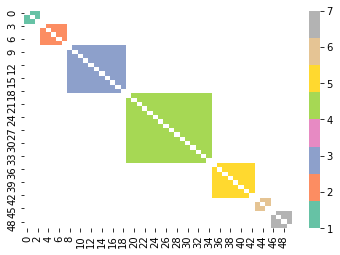

In [73]:
sns.heatmap(cluster, annot = False, cmap = 'Set2')

AttributeError: 'AxesSubplot' object has no attribute 'ax_heatmap'

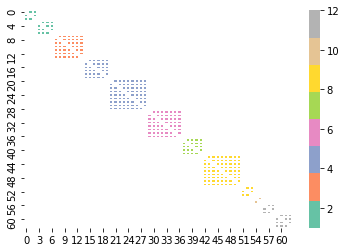

In [42]:
ax=sns.heatmap(cluster, cmap = "Set2", linewidths=2, linecolor='white')#,labels=range(14))
new_labels=[]
labels_list=list_name
for l in ax.ax_heatmap.axes.get_xticklabels():
    l.set_text(labels_list[int(l.get_text())])
    new_labels.append(l)